# Project 1

#### This project focuses on mental health the dataset is comprised of survey answers that participants gave and it was sourced from Kagle: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset. Some of the questions or problems I will be addressing from the dataset are as follows: 
* What is the relationship between a family history of mental health issues and the likelihood of seeking treatment?
* How does the availability of mental health care options in the workplace affect the likelihood of employees seeking treatment?
* Are there specific occupations where self-employed individuals report higher levels of stress or mental health struggles compared to those in traditional employment?


In [170]:
# importing pandas to start working with the data and making a data frame
import pandas as pd 

In [197]:
# reading the dataset
mental_health_data = pd.read_csv("MentalHealthDataset.csv")

Now taking a look at the data

In [200]:
mental_health_data.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

This shows the different kinds of attributes that we have availbale to view 

In [203]:
mental_health_data.shape

(292364, 17)

We have a total of 292,364 rows/tupules of data with our 17 attributes/columns. Now lets see how many of them are null? 

In [206]:
#Checking to see which row contains null values and accounting for the sum of those values
mental_health_data.isna().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

##### Based on the results, "self_employed" contains 5,202 null values. This row includes "Yes or no" answers from the people interviewed. Let's go ahead and fill these rows with the most common answers that interviewees gave.

In [209]:
mental_health_data['self_employed'] = mental_health_data['self_employed'].fillna(mental_health_data['self_employed'].mode()[0])
#0 means that we are filling the rows 

In [211]:
# let's check to see if our code worked and those values were filled!
mental_health_data.isna().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

*Great those null values were filled!*

For our visual let's address the first question "What is the relationship between a family history of mental health issues and the likelihood of seeking treatment?". In this survey particiapnts were asked: "Do you have a family history of mental illness?" and then "Have you sought treatment for a m
ental health condition?". Both of these questions were answered with "yes" or "no". 

In [215]:
# doing some pre-processing to extract the yes and no answers from the two columns 'family_history' and 'treatment'
num_records = len(mental_health_data) # will be using this num in order to create percentages

yes_yes = mental_health_data[(mental_health_data['family_history'] == 'Yes') & (mental_health_data['treatment'] == 'Yes')].shape[0] 
#.shape[0] allows you to get a count of the rows or in this case people that responded yes and yes to the survey questions to test 
# simply do print(yes_yes)
yes_yes_percentage = (yes_yes / num_records) * 100 #multilying by 100 allows for us to get our percentage

no_no = mental_health_data[(mental_health_data['family_history'] == 'No') & (mental_health_data['treatment'] == 'No')].shape[0]
no_no_percentage = (no_no / num_records) * 100 

yes_no = mental_health_data[(mental_health_data['family_history'] == 'Yes') & (mental_health_data['treatment'] == 'No')].shape[0]
yes_no_percentage= (yes_no / num_records) * 100 

no_yes =  mental_health_data[(mental_health_data['family_history'] == 'No') & (mental_health_data['treatment'] == 'Yes')].shape[0]
no_yes_percentage = (no_yes / num_records) * 100

### Now let's import Seaborn and Matplotlib in order to make some visuals!

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's make a bar graph so we can analyze all aspects of seeking or not seeking medical care. 1. The percentage of people who did have a familial history of mental health illness and chose to seek medical care. 2. Those who did but did not seek care. 3. Those who did not have a familial history and chose to seek medical care. 4 those who did not have familial history and did not seek care.

In [221]:
data = {'Has fam history & seeked care': yes_yes_percentage, 'No history & did not seek care': no_no_percentage, 
        'Has fam history & did not seek care': yes_no_percentage, 'No history & did seek care': no_yes_percentage
}
decisions = list(data.keys()) # this access the decison they made
percentages = list(data.values()) # this access the percentage of decisons

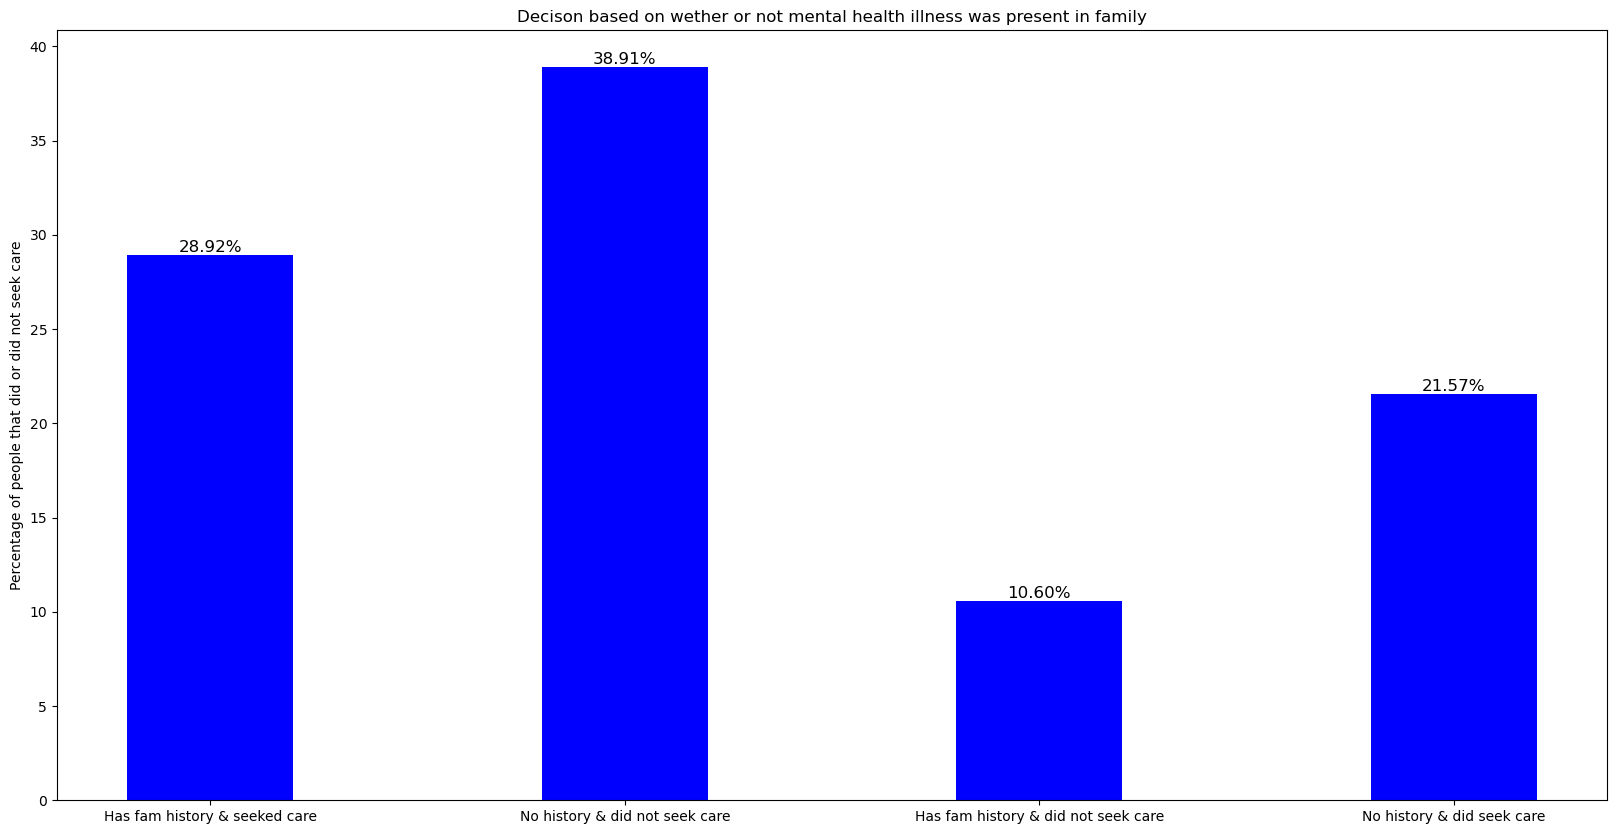

In [223]:
fig_1 = plt.figure(figsize = (20, 10))
bars = plt.bar(decisions,percentages, color = 'blue',width=.4)
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=12)
plt.ylabel("Percentage of people that did or did not seek care")
plt.title("Decison based on wether or not mental health illness was present in family")
plt.show()



Based on the data, we observe that 29% of individuals with a family history of mental health issues sought treatment, compared to 21.4% of those without such a history. This suggests that individuals with a familial predisposition to mental health issues might be slightly more likely to seek care, possibly due to increased awareness or understanding of mental health challenges within the family. Together, these two groups account for almost 50% of the population seeking care. However, it’s also important to note that 10.52% of individuals with a family history chose not to seek treatment. This could indicate that even with familial experience, some may still face barriers such as stigma, lack of resources, or personal hesitation in seeking mental health care.

#### Out of curiosity, from the results I wanted to see the countries these individuals came from, broken down by gender in the case of this study it is (Male or Female), and how many sought care regardless of family history.

In [227]:
# Printing out gender to show they different it only has male and female
print(mental_health_data['Gender'])


0         Female
1         Female
2         Female
3         Female
4         Female
           ...  
292359      Male
292360      Male
292361      Male
292362      Male
292363      Male
Name: Gender, Length: 292364, dtype: object


In [229]:
# doing one more check for unqiue values to ensure nothing was missed the output shows it contains only male and females 
mental_health_data['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [231]:
# Now lets see how many males and females were interviewed to get an idea of population proprtion 
males_interview = mental_health_data[mental_health_data['Gender'] == 'Male']
    #mental_health_data[(mental_health_data['family_history'] == 'Yes')
females_interview = mental_health_data[mental_health_data['Gender'] == 'Female']
print(f"Number of men: {len(males_interview )}")
print(f"Number of women: {len(females_interview )}")

Number of men: 239850
Number of women: 52514


**Wow, that's a pretty significant difference between the genders surveyed! This  difference presents a critical issue that needs to be addressed. If someone were only looking at visuals without considering the full context, they might incorrectly assume that men face the highest rates of mental health issues. This could lead to harmful misconceptions, as it overlooks the possibility that women or other gender identities may either underreport their mental health struggles or face greater barriers to seeking care.**

Now lets re-run the .unique function to get an idea of all the countries that were recorded

In [235]:
countries = mental_health_data['Country'].unique()
print(countries)

['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']


#### Now that we have an idea of that lets make another model! But since our data is skewed in terms of population size lets make 2 different plots. One for men and one for women based on how many of them sought out care, what countires they are from, and combine these results.

In [238]:
men_treatment = males_interview[males_interview['treatment'] == 'Yes']
# men_stress_treatment = males_interview[
#     (males_interview['treatment'] == 'Yes') & 
#     (males_interview['Growing_Stress'] == 'Yes')
# ]
men_country_counts = men_treatment['Country'].value_counts()  #this accounts for the men that sough treatment and what country they are from and the amount


/var/folders/67/h48x2gnj2gb8ph6cgn5k4kdh0000gn/T/ipykernel_42563/758714748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=men_country_counts.index, y=men_country_counts.values, palette=colors)


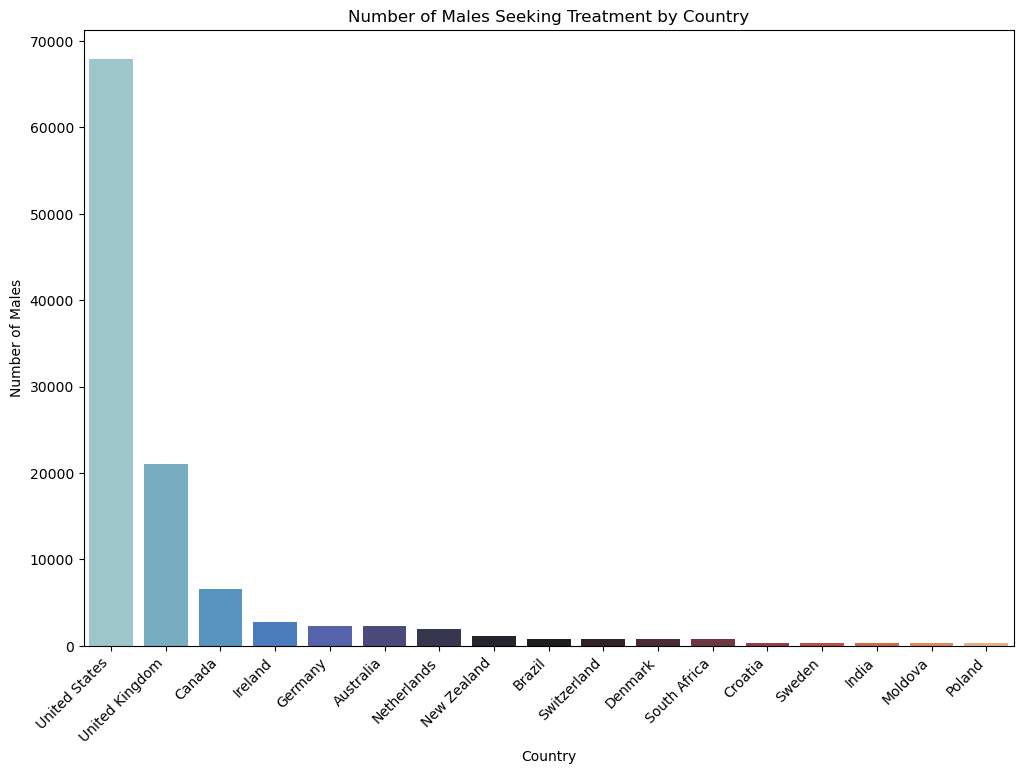

In [240]:
plt.figure(figsize=(12, 8))
colors = palette = sns.color_palette("icefire", n_colors=len(men_country_counts))

sns.barplot(x=men_country_counts.index, y=men_country_counts.values, palette=colors)

plt.title('Number of Males Seeking Treatment by Country')
plt.xlabel('Country')
plt.ylabel('Number of Males')
plt.xticks(rotation=45, ha='right')  # Rotate country names learned from class 9/11/24

plt.show()

**From the analysis, we can see the top three countries with the highest number of males seeking treatment are the United States, the United Kingdom, and Canada. For men who sought treatment, this could be due to a variety of for instance, these countries generally have better access to healthcare services, which could mean more frequent seeking of treatment. Additionally, there may be reduced stigma associated with mental health care in these regions, making individuals more likely to seek help.**

### Now let's make another one!

In [244]:
# going filtering the 
female_treatment = females_interview[females_interview['treatment']== 'Yes']
female_country_counts = female_treatment['Country'].value_counts()


/var/folders/67/h48x2gnj2gb8ph6cgn5k4kdh0000gn/T/ipykernel_42563/1153548840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=female_country_counts.index, y=female_country_counts.values, palette=colors)


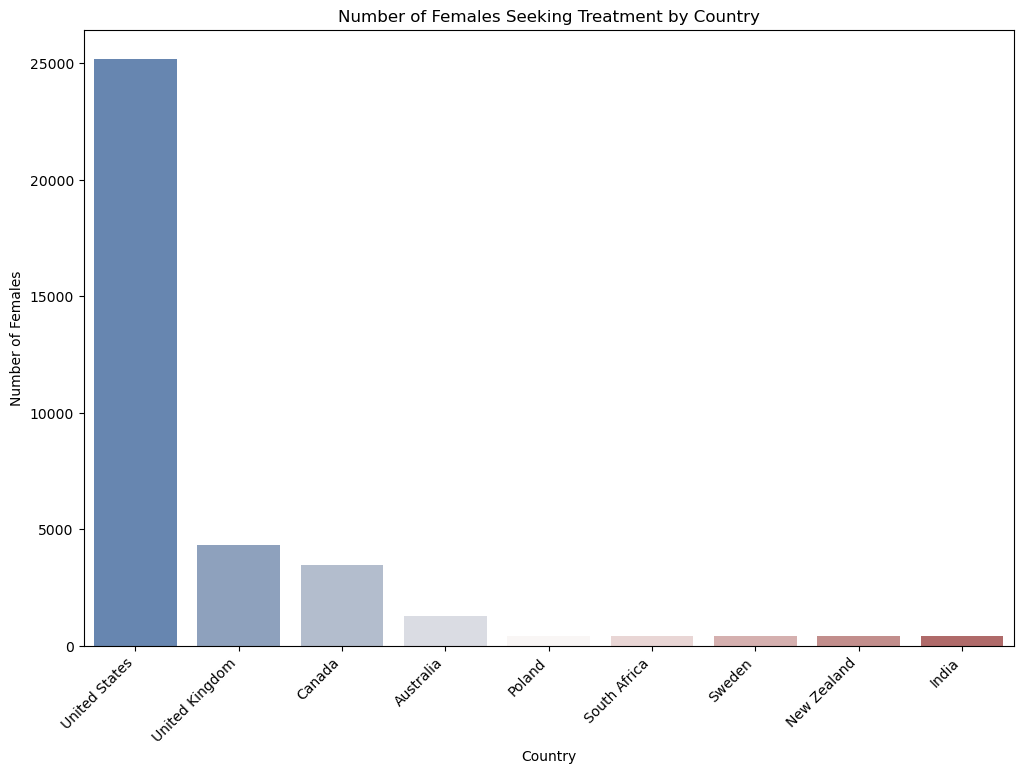

In [246]:
plt.figure(figsize=(12, 8))
colors = palette = sns.color_palette("vlag",n_colors=len(female_country_counts))

sns.barplot(x=female_country_counts.index, y=female_country_counts.values, palette=colors)

plt.title('Number of Females Seeking Treatment by Country')
plt.xlabel('Country')
plt.ylabel('Number of Females')
plt.xticks(rotation=45, ha='right')  # Rotate country names learned from class 9/11/24

plt.show()

Here we observe a similar result as we did before however, the sample size is much smaller and the countries observed are fewer. The top three countries are the same except in fourth place Australia is present, one could assume the spiders are getting to the ladies.

**Work plays a significant role in shaping mental health, having both positive and negative impacts. The pressures of meeting deadlines, managing workloads, and maintaining work-life balance can contribute to increased stress, anxiety, and burnout. For self-employed individuals, these challenges can be even more likely. Unlike traditional employees, self-employed workers often face the burden of managing every aspect of their business, from finances to client relationships, without the security of a stable income. In today’s uncertain economy, where economic downturns are increasingly common, the financial instability that comes with self-employment can provoke mental health issues. Furthermore, the lack of access to employer-provided health benefits, including mental health support, can leave self-employed individuals more vulnerable, making it harder to seek and receive the help they may need. Let's assess how many of the interviewed individuals are self-employed.**

In [282]:
self_employed = mental_health_data[mental_health_data['self_employed'] == 'Yes']
print(len(self_employed))
# Checking to see any unique values 
print(mental_health_data['Growing_Stress'].unique())

29168
['Yes' 'No' 'Maybe']


We observe that nearly 29,000 individuals in our dataset are self-employed, as well as the different answers interviewees could have given the interviewers.

**Next, let's create a scatter plot to examine the relationship between growing stress and self-employment. This will help us gauge whether there is a positive or negative correlation between these two factors and provide insights into how self-employment may impact stress levels. We will create a scatter plot against the self-employed people who are having growing stress and those who are not based on occupation.**

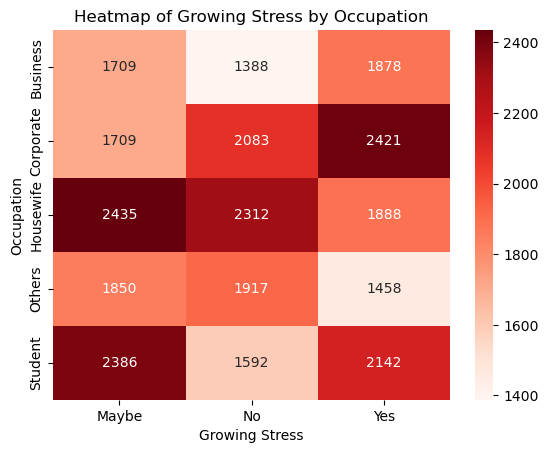

In [292]:
stress_by_occupation = pd.crosstab(self_employed['Occupation'], self_employed['Growing_Stress'])

# Plot the heatmap
sns.heatmap(stress_by_occupation, annot=True, fmt="g", cmap='Reds')

# Add title and labels
plt.title('Heatmap of Growing Stress by Occupation')
plt.xlabel('Growing Stress')
plt.ylabel('Occupation')

# Show the plot
plt.show()